# Blood Glucose Control - EDA

**Name:** *Faizaan Qureshi*



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df1 = pd.read_csv('../data/gluroo_500030.csv')
df2 = pd.read_csv('../data/gluroo_679372.csv')
df2 = df2.drop(df2.index[0:5])

# Filter rows where 'affects_iob' is True
filtered_df1 = df1[df1['affects_iob'] == True]
filtered_df2 = df2[df2['affects_iob'] == True]
df = pd.concat([filtered_df1, filtered_df2])

# Display the filtered DataFrames
print("Filtered df1 with 'affects_iob' set to True:")
print(df)

Filtered df1 with 'affects_iob' set to True:
                                   date  sender_id    bgl  bgl_date_millis  \
118    2024-05-01 09:46:39.884000-05:00     1057.0  101.0     1.714575e+12   
138    2024-05-01 11:18:11.771000-05:00     1057.0  115.0     1.714580e+12   
...                                 ...        ...    ...              ...   
32065  2024-07-31 18:37:59.663000-04:00   191150.0  119.0     1.722465e+12   
32160  2024-07-31 23:19:10.806000-04:00   191150.0  209.0     1.722482e+12   

           text template      msg_type affects_fob affects_iob  dose_units  \
118    Dosed 4u      NaN  DOSE_INSULIN       False        True         4.0   
138    Dosed 9u      NaN  DOSE_INSULIN       False        True         9.0   
...         ...      ...           ...         ...         ...         ...   
32065  Dosed 2u      NaN  DOSE_INSULIN       False        True         2.0   
32160  Dosed 1u      NaN  DOSE_INSULIN       False        True         1.0   

       food_g  fo

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

<Figure size 1200x700 with 0 Axes>

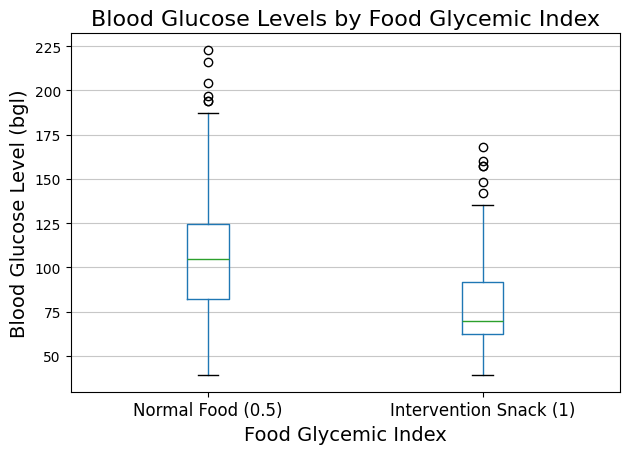

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df1 = pd.read_csv('../data/gluroo_500030.csv')
df2 = pd.read_csv('../data/gluroo_679372.csv')
df2 = df2.drop(df2.index[0:5])

# Combine the datasets
df = pd.concat([df1, df2])

# Filter rows where 'bgl' and 'food_glycemic_index' are available (non-null)
df_filtered = df.dropna(subset=['bgl', 'food_glycemic_index']).copy()

# Create a box plot for bgl by food_glycemic_index
plt.figure(figsize=(12, 7))  # Increase figure size
df_filtered.boxplot(column='bgl', by='food_glycemic_index', grid=False)

plt.title('Blood Glucose Levels by Food Glycemic Index', fontsize=16)
plt.suptitle('')  # Suppress the default title
plt.xlabel('Food Glycemic Index', fontsize=14)
plt.ylabel('Blood Glucose Level (bgl)', fontsize=14)

# Set x-ticks with better spacing and rotate if needed
plt.xticks([1, 2], ['Normal Food (0.5)', 'Intervention Snack (1)'], fontsize=12)
plt.grid(axis='y', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


In examining the relationship between blood glucose levels (BGL) and dietary choices, the above visualization indicates a notable pattern: individuals are more likely to consume intervention snacks when their BGL is low, whereas normal foods are preferred when their levels are stable. This strategic dietary behavior underscores the importance of immediate nutritional responses in managing blood glucose effectively, highlighting the critical role that food choices play in diabetes management.

Reflecting on personal experiences with a friend who has type 1 diabetes provides further context to these findings. Observing him before gym sessions, I noted that when his BGL would drop too low, he would rapidly opt for intervention foods like Coke or chocolate. This real-time application of quick-acting carbohydrates illustrates the necessity of immediate energy sources to prevent hypoglycemia, emphasizing how dietary strategies are essential for ensuring safety during physical activity.

These insights reveal a complex interplay between physiological needs and nutritional choices, reinforcing the importance of dietary awareness in individuals managing diabetes.

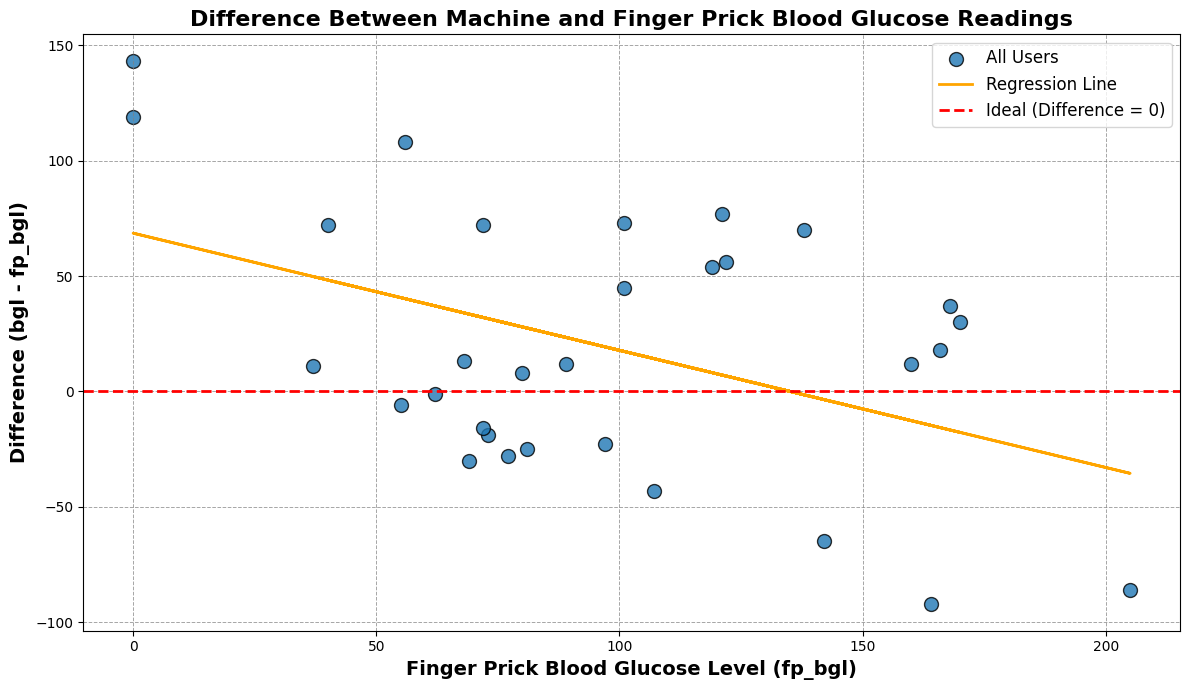

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df1 = pd.read_csv('../data/gluroo_500030.csv')
df2 = pd.read_csv('../data/gluroo_679372.csv')
df2 = df2.drop(df2.index[0:5])

# Combine the datasets
df = pd.concat([df1, df2])

# Filter rows where both 'bgl' and 'fp_bgl' are available (non-null), and explicitly create a copy
df_filtered = df.dropna(subset=['bgl', 'fp_bgl']).copy()

# Calculate the difference between 'bgl' and 'fp_bgl'
df_filtered['difference'] = df_filtered['bgl'] - df_filtered['fp_bgl']

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the difference using 'fp_bgl' as the x-axis
plt.scatter(df_filtered['fp_bgl'], df_filtered['difference'], 
            label='All Users', color='#1f77b4', alpha=0.8, edgecolor='black', s=100)

# Calculate the regression line
m, b = np.polyfit(df_filtered['fp_bgl'], df_filtered['difference'], 1)
plt.plot(df_filtered['fp_bgl'], m * df_filtered['fp_bgl'] + b, color='orange', linewidth=2, label='Regression Line')

# Adding labels and title with larger font sizes
plt.xlabel('Finger Prick Blood Glucose Level (fp_bgl)', fontsize=14, fontweight='bold')
plt.ylabel('Difference (bgl - fp_bgl)', fontsize=14, fontweight='bold')
plt.title('Difference Between Machine and Finger Prick Blood Glucose Readings', fontsize=16, fontweight='bold')

# Add a horizontal line at y = 0 to highlight the ideal
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Ideal (Difference = 0)')

# Add legend with a bigger font
plt.legend(fontsize=12)

# Show grid and customize its appearance
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In analyzing the differences between finger prick blood glucose levels (BGL) and monitor readings, the above visualization reveals a significant trend: the two measurements are closest when BGL is within the normal range. However, discrepancies arise at the extremes, where the monitor may underreport high BGLs and overreport low BGLs. This variability underscores the importance of understanding the limitations of different measurement methods in accurately managing diabetes.

Personal experiences with my friend who has type 1 diabetes further illustrate these findings. When his BGL exceeds normal levels, he may encounter situations where the monitor underreports his glucose levels, potentially leading to a false sense of security. Conversely, if his BGL drops too low, the monitor might indicate a higher reading than actual, which could result in unnecessary adjustments to his treatment plan. These scenarios highlight the critical need for individuals to be aware of the potential inaccuracies in monitor readings, especially during extreme fluctuations.

These insights give us a view into the necessity for careful interpretation of BGL measurements, particularly for those managing diabetes. Understanding the relationship between finger prick tests and monitor readings can enhance decision-making regarding treatment and lifestyle adjustments, ensuring that individuals are equipped to respond appropriately to their blood glucose levels in various situations.

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. What are some of the things holding us back from creating extremely efficient and accurate BGL monitoring systems. There's lots of systems including pumps and other modern equipment, but from personal experience I've seen that these are not always reliable as they may overshoot or undershoot insulin into the body. What are some leaps being made in the field to try and create more accurate solutions to increase the effectiveness of these treatments.
2. How do external factors such as stress, anxiety, poor diet, and others affect T1D? I'm very interested to see if the variation that can come from insulin shots can be more predictable with a healthier lifestyle. Are physiological factors like high cortisol levels and lack of sleep factors at play in managing insulin levels?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`